# L Layer Neural Network
### Contains layer_dims list that represents ---
->Number of indexes of layer_dims represent number of layers

->Number stored on particular position is the number of activation units on that position


The code is written from scratch using numpy and matplotlib.pyplot library.

This code is implemented on AND gate.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
X = np.array([[0,
               0,
               1,
               1],[0,
                   1,
                   0,
                   1]])
Y = np.array([0,
              1,
              1,
              1])
layer_dims = [2,3,3,1]

In [40]:
print("Input is = ",X)
print()
print("Output is = ",Y)
print()
for i in range(0,len(layer_dims)):
    print("units in layer",i," = ",layer_dims[i])

Input is =  [[0 0 1 1]
 [0 1 0 1]]

Output is =  [0 1 1 1]

units in layer 0  =  2
units in layer 1  =  3
units in layer 2  =  3
units in layer 3  =  1


In [41]:
def sigmoid(z):
    a  = 1/(1+np.exp(-z))
    return a

def sigmoid_backward(a):
    da = np.dot(a,(a.T-1))
    return da

In [42]:
def initialize(layer_dims):
    L = len(layer_dims)
    para = {}
    for l in range (1,L):
        para['w'+str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])
        para['b'+str(l)] = np.zeros((layer_dims[l],1))
    return para

def forward(layer_dims,para,X):
    L = len(layer_dims)
    units = {}
    units['a'+str(0)] = X
    for l in range(1,L):
        w = para['w'+str(l)]
        a = units['a'+str(l-1)]
        b = para['b'+str(l)]
        units['z'+str(l)] = np.dot(w,a) + b
        units['a'+str(l)] = sigmoid(units['z'+str(l)])
    return units

In [43]:
para = initialize(layer_dims)

units = forward(layer_dims,para,X)

print(para)
print()
print(units)

{'w1': array([[-0.10525514, -0.37656568],
       [-1.03952806,  0.79652183],
       [ 0.27392518, -0.07647186]]), 'b1': array([[0.],
       [0.],
       [0.]]), 'w2': array([[-0.42433806,  0.51633314, -1.26746281],
       [-0.29950932,  2.37395286,  1.12063028],
       [-1.45964664, -0.63809656, -0.75272503]]), 'b2': array([[0.],
       [0.],
       [0.]]), 'w3': array([[-0.9534319 ,  0.43245846,  0.06945896]]), 'b3': array([[0.]])}

{'a0': array([[0, 0, 1, 1],
       [0, 1, 0, 1]]), 'z1': array([[ 0.        , -0.37656568, -0.10525514, -0.48182083],
       [ 0.        ,  0.79652183, -1.03952806, -0.24300623],
       [ 0.        , -0.07647186,  0.27392518,  0.19745332]]), 'a1': array([[0.5       , 0.40695548, 0.47371048, 0.38182226],
       [0.5       , 0.68922998, 0.26124107, 0.43954565],
       [0.5       , 0.48089135, 0.56805628, 0.54920357]]), 'z2': array([[-0.58773386, -0.42632631, -0.78611617, -0.63116483],
       [ 1.59753691,  2.05321392,  1.11487434,  1.54455548],
       [-1.42

In [44]:
para = initialize(layer_dims)

units = forward(layer_dims,para,X)

print (para)
print()
print(units)

{'w1': array([[-0.60157149,  0.69447026],
       [ 0.34448666,  1.75959657],
       [-0.43230653, -1.28822936]]), 'b1': array([[0.],
       [0.],
       [0.]]), 'w2': array([[-0.73184814, -0.96978752, -0.42820224],
       [-0.14021585,  0.57265952, -0.11340918],
       [ 0.36893163, -1.01062464, -0.57622175]]), 'b2': array([[0.],
       [0.],
       [0.]]), 'w3': array([[ 0.72724595, -1.297484  ,  2.79632956]]), 'b3': array([[0.]])}

{'a0': array([[0, 0, 1, 1],
       [0, 1, 0, 1]]), 'z1': array([[ 0.        ,  0.69447026, -0.60157149,  0.09289876],
       [ 0.        ,  1.75959657,  0.34448666,  2.10408322],
       [ 0.        , -1.28822936, -0.43230653, -1.72053589]]), 'a1': array([[0.5       , 0.66696062, 0.35398424, 0.523208  ],
       [0.5       , 0.85315913, 0.58527997, 0.89129941],
       [0.5       , 0.21615266, 0.39357569, 0.15180215]]), 'z2': array([[-1.06491895, -1.40805402, -0.99518992, -1.31228188],
       [ 0.15951725,  0.37053755,  0.24089685,  0.41983328],
       [-0.60

In [45]:
def cost_compute(units,X,Y,layer_dims):
    L = len(layer_dims)
    A = units['a'+str(L-1)]
    loss = -(np.dot(Y,np.log(A).T) - np.dot(Y,np.log(1-A).T))
    m = np.shape(X)[1]
    cost = (1/m)*loss
    return cost

In [46]:
cost = cost_compute(units,X,Y,layer_dims)
print("Computed loss(error) is ",cost)

Computed loss(error) is  [-0.23112864]


In [47]:
def backward(units,X,Y,para,layer_dims):
    m = np.shape(X)[1]
    deri = {}
    L = len(layer_dims)
    A = units['a'+str(L-1)]
    deri['da'+str(L-1)] = -(np.divide(Y,A) - np.divide((1-Y),(1-A)))
    for l in range (L-1,0,-1):
        deri['dz'+str(l)] = np.dot(sigmoid_backward(units['a'+str(l)]),deri['da'+str(l)])
        deri['dw'+str(l)] = (1/m)*np.dot(deri['dz'+str(l)],units['a'+str(l-1)].T)
        deri['db'+str(l)] = (1/m)*np.sum(deri['dz'+str(l)],axis = 1,keepdims=True)
        deri['da'+str(l-1)] = np.dot(para['w'+str(l)].T,deri['dz'+str(l)])
        deri['db'+str(l)].reshape((layer_dims[l],1))
    return deri

In [48]:
deri = backward(units,X,Y,para,layer_dims)

print("Derivative of units and parameters is")
print(deri)

Derivative of units and parameters is
{'da3': array([[ 2.60192789, -1.7571855 , -1.66679451, -1.78576761]]), 'dz3': array([[-2.51933766,  1.70140903,  1.61388722,  1.72908389]]), 'dw3': array([[0.12270745, 0.3984211 , 0.18487394]]), 'db3': array([[0.63126062]]), 'da2': array([[-1.8321781 ,  1.23734282,  1.17369294,  1.25746925],
       [ 3.26880031, -2.20755099, -2.09399285, -2.24345869],
       [-7.04489837,  4.75770036,  4.51296054,  4.83508839]]), 'dz2': array([[ 4.3967417 , -2.96929473, -2.81655189, -3.01759283],
       [10.8760619 , -7.34503762, -6.96720317, -7.4645109 ],
       [ 6.23212372, -4.20880128, -3.99229726, -4.277261  ]]), 'dw2': array([[-5.89468876e-01, -1.16824004e+00, -2.51338340e-03],
       [-1.45814797e+00, -2.88983340e+00, -6.21726618e-03],
       [-8.35537589e-01, -1.65591180e+00, -3.56257369e-03]]), 'db2': array([[-1.10167444],
       [-2.72517245],
       [-1.56155896]]), 'da1': array([[-2.4435159 ,  1.65020358,  1.56531582,  1.67704554],
       [-4.33396268, 

In [51]:
def update(layer_dims,deri,para,alpha):
    L = len(layer_dims)
    for l in range (1,L):
        para['w'+str(l)] += alpha * deri['dw'+str(l)]
        para['b'+str(l)] += alpha * deri['db'+str(l)]
    return para

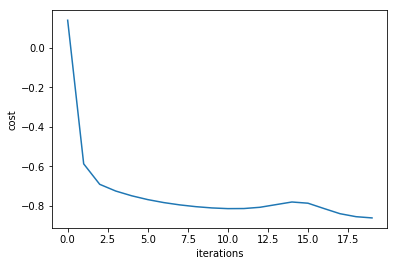

[array([0.14142749]), array([-0.58795555]), array([-0.69183468]), array([-0.72597518]), array([-0.7501755]), array([-0.76948975]), array([-0.78463062]), array([-0.79637476]), array([-0.80534546]), array([-0.81176444]), array([-0.81529985]), array([-0.81486681]), array([-0.8085279]), array([-0.795057]), array([-0.78164848]), array([-0.78775921]), array([-0.81479282]), array([-0.84106776]), array([-0.85621508]), array([-0.86249437])]


In [53]:
para = initialize(layer_dims)
costs = []
for i in range(0,2000):
    units = forward(layer_dims,para,X)
    cost = cost_compute(units,X,Y,layer_dims)
    deri = backward(units,X,Y,para,layer_dims)
    para = update(layer_dims,deri,para,alpha = 0.01)
    if (i%100 == 0):
            costs.append(cost)
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()         
print(costs)
units = forward(layer_dims,para,X)